In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import re

data_df = pd.read_csv('sfpd_dispatch_data_subset.csv')

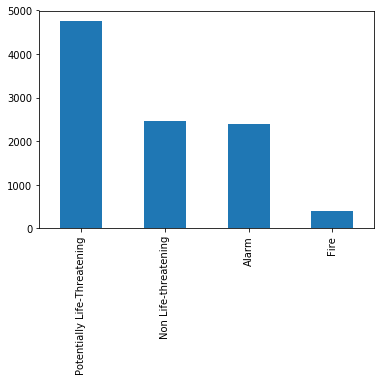

In [2]:
data_df['call_type_group'].value_counts().plot(kind='bar')

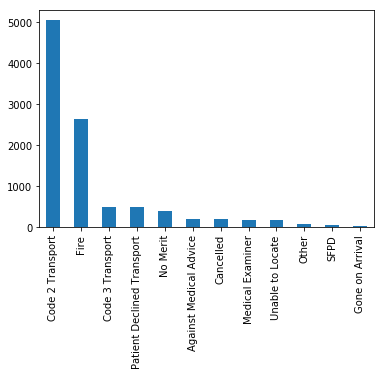

In [3]:
#Types of final call disposition

data_df['call_final_disposition'].value_counts().plot(kind='bar')

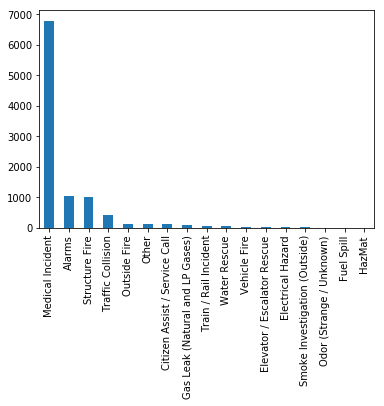

In [4]:
data_df['call_type'].value_counts().plot(kind='bar')

In [5]:
#timestamp
data_df['received_timestamp'] = data_df['received_timestamp'].str.strip(' UTC')
data_df['on_scene_timestamp'] = data_df['on_scene_timestamp'].str.strip(' UTC')

convert = data_df.copy()
convert['received_timestamp'] = pd.to_datetime(convert['received_timestamp']);
convert['on_scene_timestamp'] = pd.to_datetime(convert['on_scene_timestamp']);

convert['difference'] = convert['on_scene_timestamp'] - convert['received_timestamp']
convert['difference'] = pd.to_numeric(convert['difference'])
convert['difference'] = convert['difference']/(1000000000)/60

convert.to_csv("data.csv", encoding='utf-8', index=False)

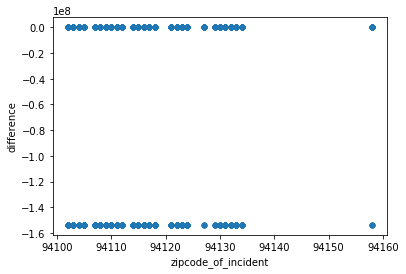

In [6]:
#zipcode vs time taken
convert.plot(kind='scatter', x='zipcode_of_incident', y='difference')

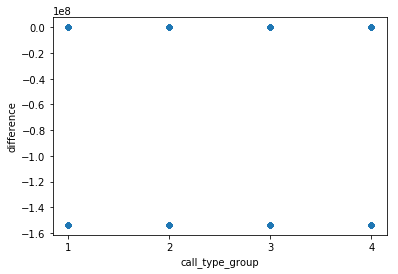

In [7]:
convert['call_type_group'] = convert['call_type_group'].replace('Potentially Life-Threatening',1)
convert['call_type_group'] = convert['call_type_group'].replace('Non Life-threatening',2)
convert['call_type_group'] = convert['call_type_group'].replace('Alarm',3)
convert['call_type_group'] = convert['call_type_group'].replace('Fire',4)
convert['call_type_group'] = pd.to_numeric(convert['call_type_group'])
convert.plot(kind='scatter', x='call_type_group', y='difference', xticks=[1,2,3,4])